# Aligning
`Aligning` is a module for you to align two separated datasets (i.e. aligning X to Y), for better comparison of the data. This demo shows simple examples of how to use the Aligning module and some differences between `SignFlips`, `SeedlessProcrustes`, and `OrthogonalProcrustes`.
For more information, see [reference](https://graspy.neurodata.io/reference/align.html)

In [142]:
import graspologic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

%matplotlib inline

## SignFlips

`SignFlips` is a function for flip one dataset X, to another dimension. It will only filp X along axis, to get it to the quadrant where Y is. 

Here is a simple instruction of using SignFlips. First, let's build two datasets X and Y, which are placed away from each other.

In [143]:
np.random.seed(1)
X = np.random.rand(10,2)
Y = np.random.rand(10,2)
Z = special_ortho_group.rvs(2)
Y = Y@Z

Then use SignFlips to get the fliped dataset, X_prime_SignFlips.

In [144]:
from graspologic.align import SignFlips
X_prime_SignFlips = SignFlips().fit_transform(X, Y)

Name the fliped dataset to be X@Q_SignFlips. Plot X, Y, X@Q_SignFlips

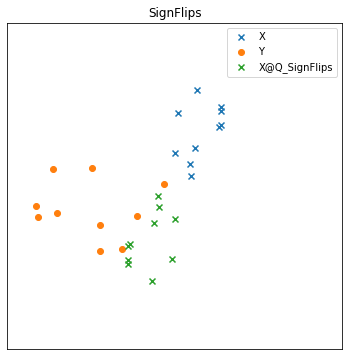

In [145]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SignFlips")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y")
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", marker='x')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

`SignFlips` can be used for some simple reflections around coordinate axis. It can bring X closer to Y, but not a perfect match of distributions in normal cases. To get better match for the distribution of two datasets, you should use `OrthogonalProcrustes` or `SeedlessProcrustes`.

## OrthogonalProcrustes

`OrthogonalProcrustes` helps a dataset X, to align with another dataset Y. It can be applied to two datasets that have same number of entries and some correspondence between the entries. In graph embeddings, it means that the vertex i in graph X has the same latent position as the vertex i in graph Y. It has similar function as scipy.linal.orthogonal_procrustes().

Here is a simple example of aligning two datasets with different entries using `OrthogonalProcrustes`. First, introduce two datasets X,Y with same entries.

In [146]:
np.random.seed(2)
X = np.random.rand(10,2)
Y = np.random.rand(10,2)
Z = special_ortho_group.rvs(2)
Y = Y@Z

Then use OrthogonalProcrustes to get the transformed dataset, X_prime_Orthogonal.

In [147]:
from graspologic.align import OrthogonalProcrustes
X_prime_Orthogonal = OrthogonalProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_OrthogonalProcrustes. Plot X, Y, X@Q_OrthogonalProcrustes

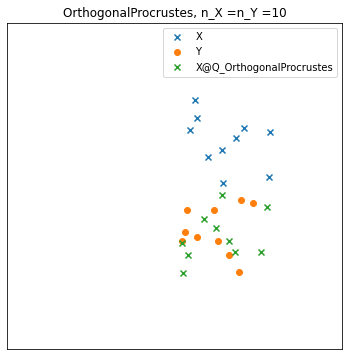

In [148]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("OrthogonalProcrustes, n_X =n_Y =10")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y")
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", marker='x')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Here, we introduce np.linlg.norm to calculate the Frobenius norm of (X_prime - Y), for quantificaion of the aligning ability in this example.

In [149]:
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
print(norm_Orthogonal)

1.1718904779030868


When the two datasets are with different entries, `OrthogonalProcrustes` will be not applicable. If you try that with `OrthogonalProcrustes`, there should be a ValueError. Please use `SeedlessProcrustes` for aligning two datasets with different shapes.

## SeedlessProcrustes
`SeedlessProcrustes` aligns two datasets via an iterative algorithm that alternates optimal transport and regular procrustes.
It can be used in the settings where the two datasets do not have the same number of entries. Here's a simple example of aligning two distict datasets using `SeedlessProcrustes`.

First, introduce two datasets X,Y with different entries.

In [150]:
np.random.seed(3)
X = np.random.rand(10,2)
Y = np.random.rand(25,2)
Z = special_ortho_group.rvs(2)
Y = Y@Z

Then introduce SeedlessProcrustes to get the transformed dataset, X_prime_Seedless.

In [151]:
from graspologic.align import SeedlessProcrustes

X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_SeedlessProcrustes. Plot X, Y, X@Q_SeedlessProcrustes

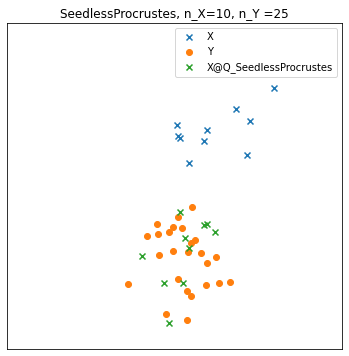

In [152]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, n_X=10, n_Y =25")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y")
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", marker='x')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();